In [1]:
import cv2
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def makeDir(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print('Error: Creating directory. ' + directory)

In [3]:
def imgFromVid(vidcap, path):
    
    count = 0
    while(vidcap.isOpened()):
        ret, image = vidcap.read()
        if not ret:
            break
        #image = cv2.resize(image, None,fx=0.25,fy=0.25)
        #image = cv2.resize(image, (320,192))
        #image = cv2.resize(image, (640,480))
        cv2.imwrite(path+"/frame%d.jpg"%count,image)
        count += 1
        
    vidcap.release()

In [4]:
def imgFromVid30fps(vidcap, path):
    
    count = 0
    while(vidcap.isOpened()):
        ret, image = vidcap.read()
        if not ret:
            break
        #image = cv2.resize(image, None,fx=0.25,fy=0.25)
        image = cv2.resize(image, (320,192))
        if(int(vidcap.get(1)-1)%8 == 0):
            cv2.imwrite(path+"/frame%d.jpg"%count,image)
            count += 1
        
    vidcap.release()

In [5]:
test_list = pd.read_csv('data/adobe240fps/test_list.txt',header=None)
train_list = pd.read_csv('data/adobe240fps/train_list.txt',header=None)

In [6]:
for i in range(len(train_list)):
    vidcap = cv2.VideoCapture('data/adobe240fps/'+train_list.iloc[i,0])
    dir_path = "data/train/true/"+train_list.iloc[i,0].split('.')[0]
    makeDir(dir_path)
    
    count = 0
    print('%d '%i+train_list.iloc[i,0]+" start")
    imgFromVid(vidcap,dir_path)    
    print('%d '%i+train_list.iloc[i,0]+" end")

0 720p_240fps_2.mov start
0 720p_240fps_2.mov end
1 720p_240fps_3.mov start
1 720p_240fps_3.mov end
2 720p_240fps_5.mov start
2 720p_240fps_5.mov end
3 720p_240fps_6.mov start
3 720p_240fps_6.mov end
4 GOPR9633.mp4 start
4 GOPR9633.mp4 end
5 GOPR9634.mp4 start
5 GOPR9634.mp4 end
6 GOPR9636.mp4 start
6 GOPR9636.mp4 end
7 GOPR9637b.mp4 start
7 GOPR9637b.mp4 end
8 GOPR9638.mp4 start
8 GOPR9638.mp4 end
9 GOPR9639.mp4 start
9 GOPR9639.mp4 end
10 GOPR9640.mp4 start
10 GOPR9640.mp4 end
11 GOPR9641.mp4 start
11 GOPR9641.mp4 end
12 GOPR9642.mp4 start
12 GOPR9642.mp4 end
13 GOPR9643.mp4 start
13 GOPR9643.mp4 end
14 GOPR9644.mp4 start
14 GOPR9644.mp4 end
15 GOPR9645.mp4 start
15 GOPR9645.mp4 end
16 GOPR9646.mp4 start
16 GOPR9646.mp4 end
17 GOPR9647.mp4 start
17 GOPR9647.mp4 end
18 GOPR9648.mp4 start
18 GOPR9648.mp4 end
19 GOPR9649.mp4 start
19 GOPR9649.mp4 end
20 GOPR9650.mp4 start
20 GOPR9650.mp4 end
21 GOPR9651.mp4 start
21 GOPR9651.mp4 end
22 GOPR9652.mp4 start
22 GOPR9652.mp4 end
23 GOPR9653.

In [11]:
for i in range(len(test_list)):
    vidcap = cv2.VideoCapture('data/adobe240fps/'+test_list.iloc[i,0])
    dir_path = "data/test/re30fps/"+test_list.iloc[i,0].split('.')[0]
    makeDir(dir_path)
    
    count = 0
    print('%d '%i+test_list.iloc[i,0]+" start")
    imgFromVid30fps(vidcap,dir_path)    
    print('%d '%i+test_list.iloc[i,0]+" end")

0 720p_240fps_1.mov start
0 720p_240fps_1.mov end
1 GOPR9635.mp4 start
1 GOPR9635.mp4 end
2 GOPR9637a.mp4 start
2 GOPR9637a.mp4 end
3 IMG_0004a.mov start
3 IMG_0004a.mov end
4 IMG_0015.mov start
4 IMG_0015.mov end
5 IMG_0023.mov start
5 IMG_0023.mov end
6 IMG_0179.m4v start
6 IMG_0179.m4v end
7 IMG_0183.MOV start
7 IMG_0183.MOV end


Optical flow

In [14]:
for i in range(len(train_list)):
    flow = np.array([])
    print("%d / %d"%(i, len(train_list)))
    #length = len(os.walk("data/train/re30fps/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])-1
    length = len(os.walk("data/train/re30fps/"+train_list.iloc[i,0].split('.')[0]).__next__()[2])-1
    for j in range(length):
        img1 = cv2.imread("data/train/re30fps/"+train_list.iloc[i,0].split('.')[0]+"/frame%d.jpg"%j, cv2.IMREAD_COLOR)
        img2 = cv2.imread("data/train/re30fps/"+train_list.iloc[i,0].split('.')[0]+"/frame%d.jpg"%(j+1), cv2.IMREAD_COLOR)

        img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

        flow01 = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        flow10 = cv2.calcOpticalFlowFarneback(img2,img1, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        flow = np.append(flow,flow01)
        flow = np.append(flow,flow10)
    flow = np.reshape(flow,(length,-1))
    flow = pd.DataFrame(flow)
    flow.to_csv("data/train/flow/"+train_list.iloc[i,0].split('.')[0]+".csv", header=False, index=False)
        

0 / 112
1 / 112
2 / 112
3 / 112
4 / 112
5 / 112
6 / 112
7 / 112
8 / 112
9 / 112
10 / 112
11 / 112
12 / 112
13 / 112
14 / 112
15 / 112
16 / 112
17 / 112
18 / 112
19 / 112
20 / 112
21 / 112
22 / 112
23 / 112
24 / 112
25 / 112
26 / 112
27 / 112
28 / 112
29 / 112
30 / 112
31 / 112


KeyboardInterrupt: 

True

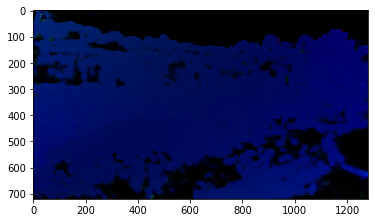

In [168]:
img = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img1 = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("data/train/true/720p_240fps_2/frame8.jpg", cv2.IMREAD_COLOR)
img3 = cv2.imread("data/train/true/720p_240fps_2/frame4.jpg", cv2.IMREAD_COLOR)

#img1 = cv2.imread("data/train/true/720p_240fps_2/frame4.jpg", cv2.IMREAD_COLOR)
#img2 = cv2.imread("data/train/true/720p_240fps_2/frame8.jpg", cv2.IMREAD_COLOR)

hsv = np.zeros_like(img)
hsv[...,1] = 255

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow1 = cv2.calcOpticalFlowFarneback(img2,img1, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow2 = cv2.calcOpticalFlowFarneback(img2,img3, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#flow = (flow1+flow2)/2

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

plt.imshow(rgb)
cv2.imwrite('ft_1.png',rgb)


In [75]:
img = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)

img0 = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img4 = cv2.imread("data/train/true/720p_240fps_2/frame4.jpg", cv2.IMREAD_COLOR)
img8 = cv2.imread("data/train/true/720p_240fps_2/frame8.jpg", cv2.IMREAD_COLOR)


hsv = np.zeros_like(img)
hsv[...,1] = 255

img0 = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
img8 = cv2.cvtColor(img8,cv2.COLOR_BGR2GRAY)

flow08 = cv2.calcOpticalFlowFarneback(img0,img8, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow48 = cv2.calcOpticalFlowFarneback(img4,img8, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow40 = cv2.calcOpticalFlowFarneback(img4,img0, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#flow = (flow1+flow2)/2

In [ ]:
hsv = np.zeros_like(img)
hsv[...,1] = 255

#flow1 = flow1/2

mag1, ang1 = cv2.cartToPolar(flow1[...,0], flow1[...,1])
mag2, ang2 = cv2.cartToPolar(flow2[...,0], flow2[...,1])

hsv[...,0] = ang1*180/np.pi/2
hsv[...,2] = cv2.normalize(mag1,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imwrite('fl20.png',rgb)

hsv = np.zeros_like(img)
hsv[...,1] = 255

hsv[...,0] = ang2*180/np.pi/2
hsv[...,2] = cv2.normalize(mag2,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imwrite('fl21.png',rgb)

In [17]:
img3 = cv2.imread("data/train/re30fps/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img4 = np.zeros_like(img3)

for i in range(img3.shape[0]):
    for j in range(img3.shape[1]):
        if(i+flow[i,j,1]<=img3.shape[0] and j+flow[i,j,0]<=img3.shape[1]):
            img4[int(i+(flow[i,j,1]/2)),int(j+(flow[i,j,0]/2))] = img3[i,j]
cv2.imwrite('test.jpg',img4)

True

In [47]:
reflow = cv2.polarToCart(mag,ang,flow.shape[0],flow.shape[1],angleInDegrees=0)

L2 Norm

In [160]:
flow1 = flow1/2
nflow = flow1-flow2
nflow.shape

(720, 1280, 2)

In [161]:
nflow = np.reshape(nflow,(nflow.shape[0]*nflow.shape[1],-1))
nflow.shape

(921600, 2)

In [162]:
L2_norm = np.linalg.norm(nflow, axis=1, ord=2)#, keepdims=True)
L2_norm.shape

(921600,)

In [163]:
L2_norm = np.reshape(L2_norm,(720,1280))
L2_norm.shape

(720, 1280)

True

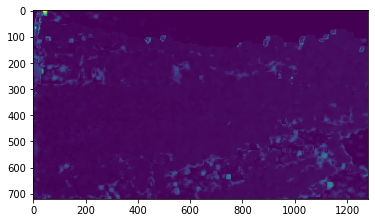

In [164]:
L2_norm = cv2.normalize(L2_norm,None,0,255,cv2.NORM_MINMAX)
plt.imshow(L2_norm)
cv2.imwrite('L2_10.png',L2_norm)

Backward Warping

In [15]:
img8 = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img = np.zeros_like(img)

for i in range(img8.shape[0]):
    for j in range(img8.shape[1]):
        #if(i+flow[i,j,1]<=img3.shape[0] and j+flow[i,j,0]<=img3.shape[1]):
            #img4[int(i+(flow[i,j,1]/2)),int(j+(flow[i,j,0]/2))] = img3[i,j]
        y = int((i + flow40[i,j,1]))
        x = int((j + flow40[i,j,0]))
        #if y>=720:
        #    y=719
        #if y<0:
        #    y=0
        #if x>=1280:
        #    x=1279
        #if x<0:
        #    x=0
        
        if y>=720 or y<0 or x>=1280 or x<0:
            img[i,j] = 0
            continue
        img[i,j] = img8[y,x]
cv2.imwrite('backWarp_fhat1_0.jpg',img)

True

In [157]:
img8 = cv2.imread("data/train/true/720p_240fps_2/frame0.jpg", cv2.IMREAD_COLOR)
img = np.zeros_like(img)

for i in range(img8.shape[0]):
    for j in range(img8.shape[1]):
        #if(i+flow[i,j,1]<=img3.shape[0] and j+flow[i,j,0]<=img3.shape[1]):
            #img4[int(i+(flow[i,j,1]/2)),int(j+(flow[i,j,0]/2))] = img3[i,j]
        y = int((i + rere[i,j,1]))
        x = int((j + rere[i,j,0]))
        #if y>=720:
        #    y=719
        #if y<0:
        #    y=0
        #if x>=1280:
        #    x=1279
        #if x<0:
        #    x=0
        
        if y>=720 or y<0 or x>=1280 or x<0:
            img[i,j] = 0
            continue
        img[i,j] = img8[y,x]
cv2.imwrite('reflow.jpg',img)

True

In [16]:
img1 = cv2.imread("backWarp_fhat1_0.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("backWarp_fhat1_1.jpg", cv2.IMREAD_COLOR)
img = np.zeros_like(img1)

img = img1/2 + img2/2
cv2.imwrite('backWarp_fhat1_2.jpg',img)

True

In [160]:
h, w = flow40.shape[:2]
fx, fy = flow40[:,:,0], flow40[:,:,1]
ang = np.arctan2(fy, fx) + np.pi
v = np.sqrt(fx*fx+fy*fy)
hsv = np.zeros((h, w, 3), np.uint8)
hsv[...,0] = ang*(180/np.pi/2)
hsv[...,1] = 255
hsv[...,2] = np.minimum(v*4, 255)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.imwrite("hsv.jpg", hsv)

True

BGR -> HSV -> ang,mag -> flow

In [171]:
def BGR2Flow(bgr, flow):
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    ang = hsv[...,0]/(180/np.pi/2)
    mag = hsv[...,2]/4
    
    reflow = cv2.polarToCart(re_mag,re_ang,flow.shape[0],flow.shape[1],angleInDegrees=0)
    reflow = np.array(reflow)
    for i in range(reflow.shape[1]):
        for j in range(reflow.shape[2]):
            flow[i,j,0] = reflow[0,i,j]
            flow[i,j,1] = reflow[1,i,j]
    
    return flow

In [172]:
flow = BGR2Flow(bgr, flow40)